Обязательная часть
Вам необходимо провести базовый EDA выбранного набора данных.
Требования к анализу:
построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

Дополнительная часть (необязательная)
построить дополнительно не менее 2 визуализаций (итого не менее 6);
в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Берем данные: COVID-19 World Vaccination Progress
https://www.kaggle.com/gpreda/covid-world-vaccination-progress

Content
The data contains the following information:

Country- this is the country for which the vaccination information is provided;
Country ISO Code - ISO code for the country;
Date - date for the data entry; for some of the dates we have only the daily vaccinations, for others, only the (cumulative) total;
Total number of vaccinations - this is the absolute number of total immunizations in the country;
Total number of people vaccinated - a person, depending on the immunization scheme, will receive one or more (typically 2) vaccines; at a certain moment, the number of vaccination might be larger than the number of people;
Total number of people fully vaccinated - this is the number of people that received the entire set of immunization according to the immunization scheme (typically 2); at a certain moment in time, there might be a certain number of people that received one vaccine and another number (smaller) of people that received all vaccines in the scheme;
Daily vaccinations (raw) - for a certain data entry, the number of vaccination for that date/country;
Daily vaccinations - for a certain data entry, the number of vaccination for that date/country;
Total vaccinations per hundred - ratio (in percent) between vaccination number and total population up to the date in the country;
Total number of people vaccinated per hundred - ratio (in percent) between population immunized and total population up to the date in the country;
Total number of people fully vaccinated per hundred - ratio (in percent) between population fully immunized and total population up to the date in the country;
Number of vaccinations per day - number of daily vaccination for that day and country;
Daily vaccinations per million - ratio (in ppm) between vaccination number and total population for the current date in the country;
Vaccines used in the country - total number of vaccines used in the country (up to date);
Source name - source of the information (national authority, international organization, local organization etc.);
Source website - website of the source of information;

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [3]:
covid_vaccine = pd.read_csv('country_vaccinations.csv')
covid_vaccine

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,Zimbabwe,ZWE,2021-03-30,85866.0,72944.0,12922.0,4256.0,5810.0,0.58,0.49,0.09,391.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1378425187...
9985,Zimbabwe,ZWE,2021-03-31,91880.0,76995.0,14885.0,6014.0,5712.0,0.62,0.52,0.10,384.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1378425187...
9986,Zimbabwe,ZWE,2021-04-01,105307.0,87791.0,17516.0,13427.0,6617.0,0.71,0.59,0.12,445.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1378425187...
9987,Zimbabwe,ZWE,2021-04-02,124753.0,103815.0,20938.0,19446.0,8156.0,0.84,0.70,0.14,549.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1378425187...


In [4]:
covid_vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9989 entries, 0 to 9988
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              9989 non-null   object 
 1   iso_code                             9989 non-null   object 
 2   date                                 9989 non-null   object 
 3   total_vaccinations                   6036 non-null   float64
 4   people_vaccinated                    5412 non-null   float64
 5   people_fully_vaccinated              3818 non-null   float64
 6   daily_vaccinations_raw               5054 non-null   float64
 7   daily_vaccinations                   9806 non-null   float64
 8   total_vaccinations_per_hundred       6036 non-null   float64
 9   people_vaccinated_per_hundred        5412 non-null   float64
 10  people_fully_vaccinated_per_hundred  3818 non-null   float64
 11  daily_vaccinations_per_million

Описание: что собой представляют данные и как можно представить данные для анализа.
Средние значения в данных можно не определять, т.к. мы имеем дело с нарастанием количества вакцинированных во времени.
Определим, в каких странах наибольший процент вакцинированных и полностью вакцинированных; расставим по убыванию; топ
Определим, в каких странах наибольший темп роста вакцинированных и полностью вакцинированных за три месяца
Определим количество видов (названий) вакцин. Нет данных по количеству вакцинированных по видам вакцин, поэтому можем показать, какие вакцины в каких странах используются. Топ вакцин, которые используются в большинстве стран.
На примере двух стран показать разницу в темпе роста вакцинируемых.


In [5]:
covid_vaccine['date_full'] = pd.to_datetime(covid_vaccine.date)
# Переводим дату в формат строки с указанием года и месяца, чтобы затем сгруппировать данные по месяцам)
def date_to_month(date):
    return date.strftime('%Y-%m') 

#covid_vaccine['date_month'] = pd.to_datetime(covid_vaccine.date, format='%Y-%m', exact = False).apply(lambda x: x.strftime('%Y-%m'))
covid_vaccine['date_month'] = pd.to_datetime(covid_vaccine.date, format='%Y-%m', exact = False).apply(date_to_month)
covid_vaccine[['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'daily_vaccinations_raw', 
               'daily_vaccinations']] = covid_vaccine[['total_vaccinations', 'people_vaccinated', 
                'people_fully_vaccinated', 'daily_vaccinations_raw', 'daily_vaccinations']].fillna(0).astype(np.int64)
covid_vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9989 entries, 0 to 9988
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              9989 non-null   object        
 1   iso_code                             9989 non-null   object        
 2   date                                 9989 non-null   object        
 3   total_vaccinations                   9989 non-null   int64         
 4   people_vaccinated                    9989 non-null   int64         
 5   people_fully_vaccinated              9989 non-null   int64         
 6   daily_vaccinations_raw               9989 non-null   int64         
 7   daily_vaccinations                   9989 non-null   int64         
 8   total_vaccinations_per_hundred       6036 non-null   float64       
 9   people_vaccinated_per_hundred        5412 non-null   float64       
 10  people_fully

In [6]:
covid_vaccine

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,date_full,date_month
0,Afghanistan,AFG,2021-02-22,0,0,0,0,0,0.00,0.00,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,2021-02-22,2021-02
1,Afghanistan,AFG,2021-02-23,0,0,0,0,1367,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,2021-02-23,2021-02
2,Afghanistan,AFG,2021-02-24,0,0,0,0,1367,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,2021-02-24,2021-02
3,Afghanistan,AFG,2021-02-25,0,0,0,0,1367,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,2021-02-25,2021-02
4,Afghanistan,AFG,2021-02-26,0,0,0,0,1367,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,2021-02-26,2021-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,Zimbabwe,ZWE,2021-03-30,85866,72944,12922,4256,5810,0.58,0.49,0.09,391.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1378425187...,2021-03-30,2021-03
9985,Zimbabwe,ZWE,2021-03-31,91880,76995,14885,6014,5712,0.62,0.52,0.10,384.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1378425187...,2021-03-31,2021-03
9986,Zimbabwe,ZWE,2021-04-01,105307,87791,17516,13427,6617,0.71,0.59,0.12,445.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1378425187...,2021-04-01,2021-04
9987,Zimbabwe,ZWE,2021-04-02,124753,103815,20938,19446,8156,0.84,0.70,0.14,549.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1378425187...,2021-04-02,2021-04


In [7]:
covid_vaccine_by_country = covid_vaccine[['country', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
                                          'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred']].groupby(
                                            ['country']).max()
covid_vaccine_by_country

,total_vaccinations,people_vaccinated,people_fully_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
country,,,,,
Afghanistan,54000,54000,0,0.14,NaN
Albania,206708,6073,655,0.21,0.02
Algeria,75000,0,0,NaN,NaN
Andorra,12440,7098,1265,9.19,1.64
Angola,130750,130750,0,0.40,NaN
...,...,...,...,...,...
Uruguay,823477,727680,95797,20.95,2.76
Venezuela,98000,98000,0,0.34,NaN
Vietnam,52335,52335,0,0.05,NaN


In [8]:
covid_vaccine_by_country.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
count,1.660000e+02,1.660000e+02,1.660000e+02,155.000000,97.000000
mean,4.306901e+06,2.467928e+06,9.174703e+05,12.458516,7.360000
std,1.856571e+07,1.062163e+07,5.018467e+06,16.713368,11.842493
min,3.400000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,4.194875e+04,2.070200e+04,0.000000e+00,0.725000,0.940000
50%,2.255015e+05,1.230305e+05,1.297150e+04,5.870000,4.560000
75%,1.092114e+06,8.246715e+05,2.689730e+05,14.105000,8.000000
max,1.671878e+08,1.075154e+08,6.239206e+07,95.850000,84.930000


In [9]:
covid_vaccine_by_country.people_vaccinated.value_counts()

0           11
500000       2
47968        1
103006       1
9821         1
            ..
1235368      1
5539494      1
5277886      1
591012       1
10039938     1
Name: people_vaccinated, Length: 155, dtype: int64

In [10]:
# Чтобы построить столбчатую диаграмму с накоплением по данным: один раз вакцинированные + полностью вакцинированные,
# заполним нулевые значения по столбцу people_vaccinated значениями из столбца total_vaccinations (допущение).
# Но это не избавляет данные от неполноты, т.к. не всегда people_vaccinated+people_fully_vaccinated = total_vaccinations
# Для целей ДЗ по визуализации пренебрежем этой неточностью данных.
covid_vaccine_by_country.people_vaccinated = covid_vaccine_by_country.people_vaccinated.mask(covid_vaccine_by_country['people_vaccinated'] == 0, 
                              covid_vaccine_by_country['total_vaccinations'])
covid_vaccine_by_country.head(10)

,total_vaccinations,people_vaccinated,people_fully_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
country,,,,,
Afghanistan,54000,54000,0,0.14,NaN
Albania,206708,6073,655,0.21,0.02
Algeria,75000,75000,0,NaN,NaN
Andorra,12440,7098,1265,9.19,1.64
Angola,130750,130750,0,0.40,NaN
Anguilla,5348,5348,0,35.65,NaN
Antigua and Barbuda,26424,26424,0,NaN,NaN
Argentina,4260808,3576423,684385,7.91,1.51
Australia,844309,159294,0,0.62,NaN


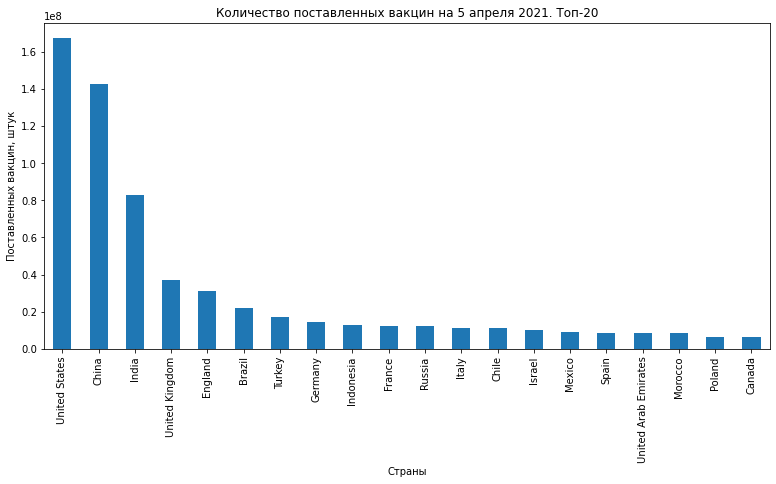

In [11]:
#Столбчатая диаграмма из pandas.
bar_data1 = covid_vaccine_by_country.total_vaccinations.sort_values(ascending = False).head(20)
bar_chart1 = bar_data1.plot(kind = 'bar',
                        title='Количество поставленных вакцин на 5 апреля 2021. Топ-20',
                        xlabel='Страны',
                        ylabel='Поставленных вакцин, штук')

In [12]:
# Выберем только Топ-11, до России включительно.
bar_data_11 = covid_vaccine_by_country.total_vaccinations.sort_values(ascending = False).head(11)
bar_data_11

country
United States     167187795
China             142802000
India              83110926
United Kingdom     37013749
England            31090290
Brazil             21960953
Turkey             16993574
Germany            14374088
Indonesia          12649124
France             12405899
Russia             12215342
Name: total_vaccinations, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

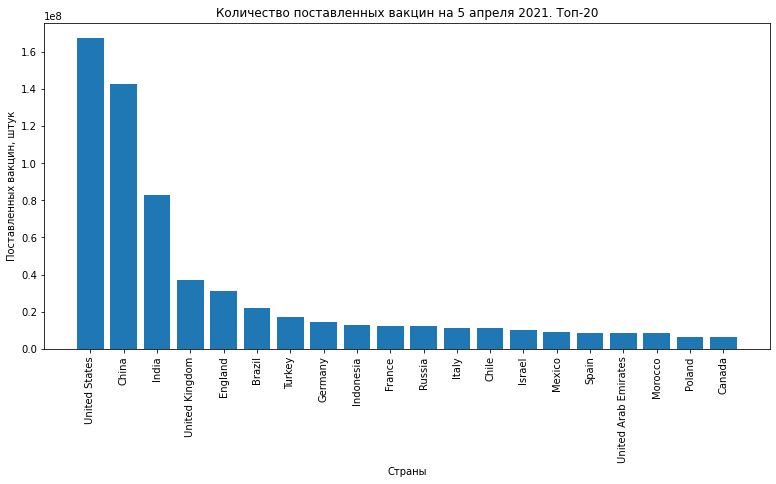

In [15]:
#Столбчатая диаграмма из matplotlib
plt.bar(bar_data1.index, bar_data1)
plt.title('Количество поставленных вакцин на 5 апреля 2021. Топ-20')
plt.xlabel('Страны')
plt.ylabel('Поставленных вакцин, штук')
#plt.axis([-1, 20, 0, 200000000]) Не получилось сделать, чтобы размерность оси Y не делалась автоматически с разрядом 10^8.
# Все равно автомат. приводит шкалу оси Y к формату 0,0 * 10^8. Для визуальной картинки лучше было бы задать в млн. штук, например.
plt.xticks(rotation=90)

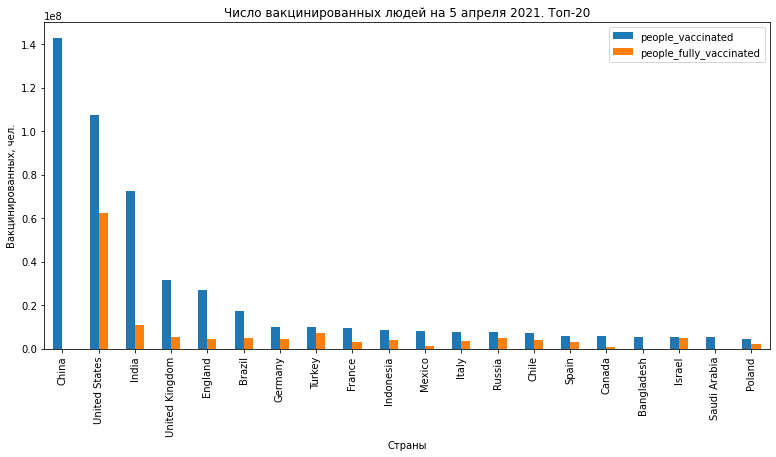

In [16]:
# Столбчатая диаграмма для двух рядов данных: всего вакцицированных и полностью вакцинированных.
bar_data2 = covid_vaccine_by_country[['people_vaccinated', 
                                     'people_fully_vaccinated']].sort_values(by='people_vaccinated', ascending = False).head(20)
bar_chart2 = bar_data2.plot(kind = 'bar',
                            stacked=False,
                        title='Число вакцинированных людей на 5 апреля 2021. Топ-20',
                        xlabel='Страны',
                        ylabel='Вакцинированных, чел.')

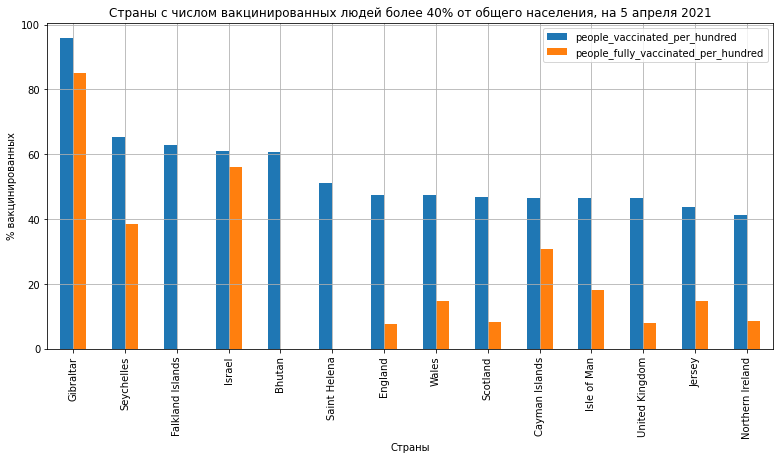

In [17]:
#Снова столбчатая диаграмма по двум категориям
bar_data3 = covid_vaccine_by_country[['people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred']].loc[
                    covid_vaccine_by_country['people_vaccinated_per_hundred'] >= 40 ].sort_values(
                    by='people_vaccinated_per_hundred', ascending = False)
bar_chart3 = bar_data3.plot(kind='bar',
                             stacked=False,
                            grid=True,
                        title='Страны с числом вакцинированных людей более 40% от общего населения, на 5 апреля 2021',
                        xlabel='Страны',
                        ylabel='% вакцинированных')

In [18]:
#Делаем датафрейм с выбором данных по 11 стран с наибольшим количеством поставленных вакцин, с группировкой по месяцам
covid_vaccinations_by_month = covid_vaccine[['country', 'date_month', 'total_vaccinations']].loc[
                                        covid_vaccine['country'].isin(bar_data_11.index)].groupby(['country', 
                                        'date_month']).max()
covid_vaccinations_by_month

total_vaccinations
country        date_month                    
Brazil         2021-01                2074059
               2021-02                8433568
               2021-03               19155981
               2021-04               21960953
China          2020-12                4500000
               2021-01               24000000
               2021-02               52520000
               2021-03              119821000
               2021-04              142802000
England        2020-12                 842638
               2021-01                8543262
               2021-02               17812739
               2021-03               29973324
               2021-04               31090290
France         2020-12                    316
               2021-01                1533630
               2021-02                4560861
               2021-03               11386807
               2021-04               12405899
Germany        2020-12                 200269
               2021-01                2518052
               2021-02                6246888
               2021-03               13874086
               2021-04               14374088
India          2021-01                3758843
               2021-02               14301266
               2021-03               65117896
               2021-04               83110926
Indonesia      2021-01                 515681
               2021-02                2690163
               2021-03               11674871
               2021-04               12649124
Russia         2020-12                  52000
               2021-01                1000000
               2021-02                3900000
               2021-03               11373572
               2021-04               12215342
Turkey         2021-01                1986237
               2021-02                8547875
               2021-03               15834787
               2021-04               16993574
United Kingdom 2020-12                1005073
               2021-01                9790576
               2021-02               21091267
               2021-03               35660902
               2021-04               37013749
United States  2020-12                2794588
               2021-01               31123299
               2021-02               75236003
               2021-03              150273292
               2021-04              167187795

In [19]:
# Преобразуем данные: убираем индекс, делаем сводную таблицу, чтобы строить графики по сериям
a = covid_vaccinations_by_month.reset_index().pivot(index='date_month', columns='country', 
                                           values='total_vaccinations').fillna(0)
a

country,Brazil,China,England,France,Germany,India,Indonesia,Russia,Turkey,United Kingdom,United States
date_month,,,,,,,,,,,
2020-12,0.0,4500000.0,842638.0,316.0,200269.0,0.0,0.0,52000.0,0.0,1005073.0,2794588.0
2021-01,2074059.0,24000000.0,8543262.0,1533630.0,2518052.0,3758843.0,515681.0,1000000.0,1986237.0,9790576.0,31123299.0
2021-02,8433568.0,52520000.0,17812739.0,4560861.0,6246888.0,14301266.0,2690163.0,3900000.0,8547875.0,21091267.0,75236003.0
2021-03,19155981.0,119821000.0,29973324.0,11386807.0,13874086.0,65117896.0,11674871.0,11373572.0,15834787.0,35660902.0,150273292.0
2021-04,21960953.0,142802000.0,31090290.0,12405899.0,14374088.0,83110926.0,12649124.0,12215342.0,16993574.0,37013749.0,167187795.0


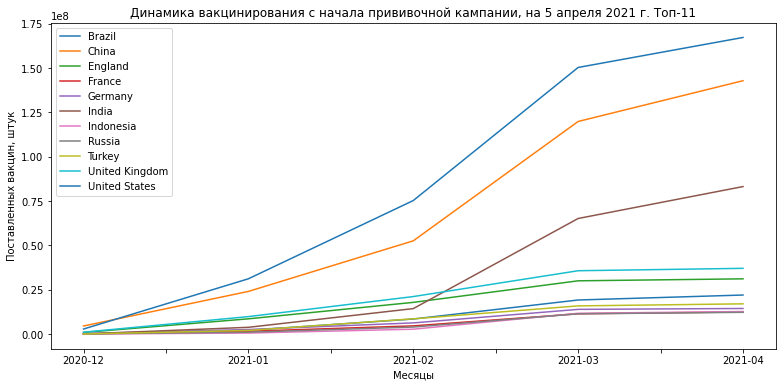

In [20]:
# Линейный график по странам 
ax = a.plot(
                         title='Динамика вакцинирования с начала прививочной кампании, на 5 апреля 2021 г. Топ-11',
                         xlabel='Месяцы',
                         ylabel='Поставленных вакцин, штук')
ax.legend(loc='upper left')

In [21]:
#Делаем датафрейм с выбором данных по 11 странам с наибольшим количеством поставленных вакцин, с группировкой по месяцам -
# по количеству вакцинированных
covid_vaccinated_by_month = covid_vaccine[['country', 'date_month', 'people_vaccinated_per_hundred']].loc[
                                        covid_vaccine['country'].isin(bar_data_11.index)].groupby(['country', 
                                        'date_month']).max()
a1 = covid_vaccinated_by_month.reset_index().pivot(index='date_month', columns='country', 
                                           values='people_vaccinated_per_hundred').fillna(0)
a1

country,Brazil,China,England,France,Germany,India,Indonesia,Russia,Turkey,United Kingdom,United States
date_month,,,,,,,,,,,
2020-12,0.00,0.0,1.50,0.00,0.24,0.00,0.00,0.04,0.00,1.48,0.84
2021-01,0.96,0.0,14.36,2.18,2.30,0.27,0.18,0.69,0.00,13.69,7.54
2021-02,3.07,0.0,30.58,4.36,4.90,0.86,0.62,1.51,8.15,29.87,14.88
2021-03,7.02,0.0,47.00,12.53,11.58,4.04,2.93,4.80,10.66,45.88,29.18
2021-04,8.06,0.0,47.52,13.64,11.98,5.24,3.16,5.19,11.62,46.52,32.15


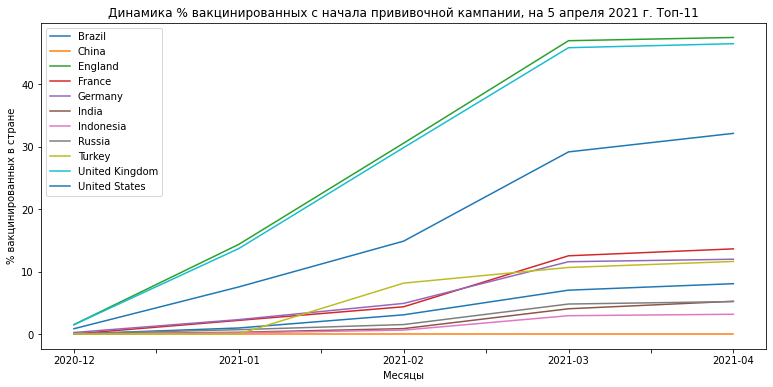

In [22]:
# Линейный график по странам из Топ-11 по показателю % вакцинированных в стране
ax = a1.plot(
                         title='Динамика % вакцинированных с начала прививочной кампании, на 5 апреля 2021 г. Топ-11',
                         xlabel='Месяцы',
                         ylabel='% вакцинированных в стране')
ax.legend(loc='upper left')

In [23]:
#Будем искать ответ на вопрос о наиболее распространенных вакцинах, по странам. По количеству вакцин данных по видам нет.
covid_vaccine_types = covid_vaccine[['country', 'vaccines']]
covid_vaccine_types.head()

,country,vaccines
0,Afghanistan,Oxford/AstraZeneca
1,Afghanistan,Oxford/AstraZeneca
2,Afghanistan,Oxford/AstraZeneca
3,Afghanistan,Oxford/AstraZeneca
4,Afghanistan,Oxford/AstraZeneca


In [24]:
# covid_vaccine_types.drop('split', axis = 1)
# #covid_vaccine_types['split'] = 
# covid_vaccine_types.vaccines.str.split(pat=',', expand = True).loc[covid_vaccine_types['country'] == 'United States']
# #covid_vaccine_types

In [25]:
# Нашла пример, как разделить из одного поля, в которой содержится запись для каждой страны с названиями всех
# используемых в ней вакцин, через запятую типа: Pfizer/BioNTech, Sinovac - в разные строки.
# Результат: одна строка содержит название страны и название одной вакцины. Т.е. для страны столько строк, сколько используется вакцин.
rows = []
_ = covid_vaccine_types.apply(lambda row: [rows.append([row['country'], nn.strip()]) for nn in row.vaccines.split(',')], axis=1)
covid_vaccine_types_new = pd.DataFrame(rows, columns=covid_vaccine_types.columns).drop_duplicates()
#Группируем по типам вакцин и считаем количество рядов = стран для каждой вакцины
covid_vaccine_types_new.groupby(['vaccines']).count()

,country
vaccines,
Covaxin,1
EpiVacCorona,1
Johnson&Johnson,2
Moderna,35
Oxford/AstraZeneca,105
Pfizer/BioNTech,82
Sinopharm/Beijing,24
Sinopharm/Wuhan,2
Sinovac,18


In [26]:
covid_vaccine_types_new.groupby(['vaccines']).count().sum()

country    290
dtype: int64

In [27]:
# Проверка, какие вакцины используются в США
covid_vaccine_types_new.loc[covid_vaccine_types_new['country'] == 'United States']

,country,vaccines
19577,United States,Johnson&Johnson
19578,United States,Moderna
19579,United States,Pfizer/BioNTech


In [28]:
#Выбираем данные для круговой диаграммы
pie_data1 = covid_vaccine_types_new.vaccines.value_counts().sort_values(ascending = False).head(6)
pie_data1

Oxford/AstraZeneca    105
Pfizer/BioNTech        82
Moderna                35
Sinopharm/Beijing      24
Sputnik V              20
Sinovac                18
Name: vaccines, dtype: int64

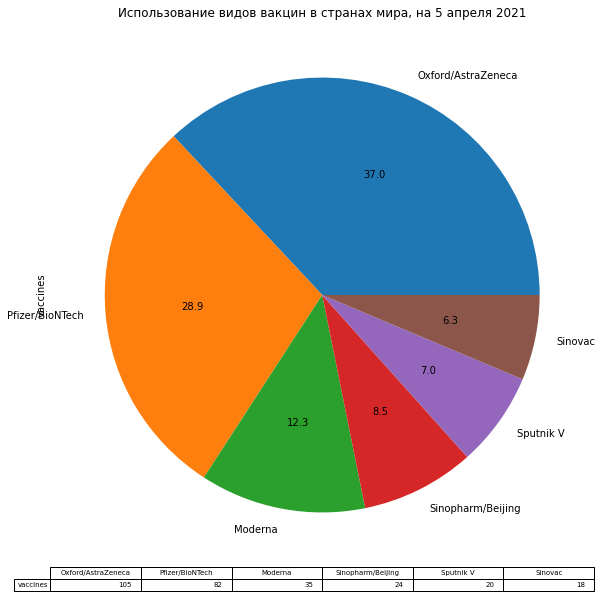

In [29]:
# Не удалось сделать надписи на круг. диаграмме - сами значения. В примерах нашла, что можно поставить доли категорий, в %.
# Поскольку % использования вакцины в этих данных не очень интересны, показана таблица - в скольки странах используется
# каждая из шести самых распространенных по количеству стран вакцин.
# Не смогла увеличить размер таблицы с данными, пришлось увеличить размер самой диаграммы.
# Не смогла убрать надпись "vaccines" - стоит как label, она не нужна
pie_chart1 = pie_data1.plot(kind='pie',
                             title='Использование видов вакцин в странах мира, на 5 апреля 2021',
                            autopct='%.1f',
                           table=True,
                           figsize=(10, 10))